# Análise de Dividendos Históricos para Manutenção de Portfólio de FIIs

## Objeivos

- Praticar análise de dados
- Obter insights para manutenção de portfólio de ativos com base na análise dos dividendos históricos
- Identificar ativos que potencialmente podem ser removidos do portfólio, ou diminuir a posição
- Identificar ativos que podem representar uma oportunidade de investimento dentro do portfólio

## Dados Históricos

**Os dados foram extraídos do histórico de dividendos de uma conta no MyProfit disponível em https://myprofitweb.com/**

In [166]:
import pandas as pd
dados = pd.read_csv("dividendos.csv")

limite_meses_relatorios = 12

#filtrando pela categoria configurada como Renda Variavel no MyProfitWeb
dados = dados[ dados['Minha Categoria'] == 'Renda Variavel' ]

#eliminando 2 ativos que não existem mais no portfólio, mas que são trazidos na massa de dados
dados = dados[ dados['Ativo'] != 'XPLG11' ]
dados = dados[ dados['Ativo'] != 'HSLG11' ]

#calculando diferença entre DY - YOC e criando nova coluna no DataFrame para posterior utilização
dados['YOC_DY'] = dados['DY'].str.replace(' %','').astype(float) - dados['YOC'].str.replace(' %','').astype(float)

#tratando valor por cota para posterior utilização
dados['VALOR_DY_COTA'] = dados['Valor por cota'].str.replace('R$ ','').str.replace(',','.').astype(float)

display(dados)

,Ativo,Minha Categoria,Recebido,Total investido,Total atual,Data pgto.,Data COM,YOC,DY,Cotas,Preço médio,Cotação,Valor por cota,YOC_DY,VALOR_DY_COTA
2,BCFF11,Renda Variavel,"R$ 8,55","R$ 1.658,57","R$ 1.729,00",15/09/2020,08/09/2020,0.52 %,0.49 %,19,"R$ 87,2933","R$ 91,00","R$ 0,45",-0.03,0.45
3,KNRI11,Renda Variavel,"R$ 5,20","R$ 1.325,24","R$ 1.154,00",15/09/2020,31/08/2020,0.39 %,0.45 %,8,"R$ 165,6550","R$ 144,25","R$ 0,65",0.06,0.65
4,MXRF11,Renda Variavel,"R$ 4,27","R$ 655,76","R$ 650,87",15/09/2020,31/08/2020,0.65 %,0.66 %,61,"R$ 10,7502","R$ 10,67","R$ 0,07",0.01,0.07
9,BCFF11,Renda Variavel,"R$ 8,55","R$ 1.658,57","R$ 1.625,45",14/08/2020,07/08/2020,0.52 %,0.53 %,19,"R$ 87,2933","R$ 85,55","R$ 0,45",0.01,0.45
10,KNRI11,Renda Variavel,"R$ 5,20","R$ 1.325,24","R$ 1.254,56",14/08/2020,31/07/2020,0.39 %,0.41 %,8,"R$ 165,6550","R$ 156,82","R$ 0,65",0.02,0.65
11,MXRF11,Renda Variavel,"R$ 1,40","R$ 219,07","R$ 219,00",14/08/2020,31/07/2020,0.64 %,0.64 %,20,"R$ 10,9533","R$ 10,95","R$ 0,07",0.00,0.07
14,BCFF11,Renda Variavel,"R$ 2,40","R$ 546,87","R$ 542,40",14/07/2020,07/07/2020,0.44 %,0.44 %,6,"R$ 91,1450","R$ 90,40","R$ 0,40",0.00,0.40
15,KNRI11,Renda Variavel,"R$ 2,60","R$ 692,01","R$ 675,76",14/07/2020,30/06/2020,0.38 %,0.38 %,4,"R$ 173,0036","R$ 168,94","R$ 0,65",0.00,0.65
17,BCFF11,Renda Variavel,"R$ 3,20","R$ 706,29","R$ 734,64",15/06/2020,05/06/2020,0.45 %,0.44 %,8,"R$ 88,2868","R$ 91,83","R$ 0,40",-0.01,0.40
18,KNRI11,Renda Variavel,"R$ 2,60","R$ 692,01","R$ 689,56",15/06/2020,29/05/2020,0.38 %,0.38 %,4,"R$ 173,0036","R$ 172,39","R$ 0,65",0.00,0.65


## Dividendos Recebidos por ativo

**Começamos agrupando os dividendos recebidos por ativo, ordenados do maior pagador para o menor**
Importante considerar que nem todos os ativos irão possuir a mesma quantidade de cotas, então aqui só um panorama de distribuição por ativo

In [167]:
dados['Dividendos'] = dados['Recebido'].str.replace('R$ ','').str.replace(',','.').astype(float)
recebido_por_ativo = dados[['Ativo','Dividendos']].groupby('Ativo').sum().sort_values(by='Dividendos', ascending=False)

display(recebido_por_ativo)

,Dividendos
Ativo,
BCFF11,28.50
KNRI11,23.11
MXRF11,5.67


## Relação DY - YOC agrupadas por ativo nos últimos 12 meses

Ao calcular o Dividend Yield menos o Yield on Cost é possível, se o resultado for positivo, indica um aumento nos dividendos
ou uma queda na cotação do ativo, e dependendo de uma análise qualitativa no ativo que atender a esse cenário, pode valer a pena o aporte

**Para Calcular o DY do mês basta dividir o valor do dividendo pago por cota pelo valor da cotação e multiplicar por 100**

**Cenário 1 - Dividendo estável, e queda da cotação**
Se possuirmos 10 cotas do ativo ABC123 custando 100,00 cada uma, e mensalmente recebemos 1,00 em dividendos por cota, 
então nosso YOC é 1.00 (1,00 / 100,00) X 100.
Agora imaginemos que o valor da cota do ativo ABC123 caiu para 95,00, mas os dividendos permanecem os mesmos 1,00 por cota, agora passamos a ter
um DY maior que o YOC, a saber um DY de 1.05 (1,00 / 95,00) X 100 maior que o YOC de 1.00. Isso graças a queda da cotação de 
100,00 para 95,00.
Isso mostra um cenário favorável já que o que caiu foi a cotação do ativo, e não o dividendo.

**Cenário 2 - Cotação relativamente estável, e crescimento do dividendo**
Pensando no mesmo exemplo de Cenário 1, imaginemos que a cotação permaneceu em 100,00 e o dividendo cresceu para 1,10, 
nesse caso o DY também passa a ser maior que o YOC, o DY vale 1.10 (1,10 / 100,00) X 100.

Por esse motivo, abaixo os ativos estão sendo agrupados, considerando as distribuições dos ultimos 12 meses, 
calculando o percentual de ocorrências para cada ativo onde essa relação DY - YOC é positiva, e esses ativos 
com essa relação positiva são os que nos interessam, porque ou a cotação caiu e o dividendo é estável, ou a cotação
se manteve relativamente estável e o dividendo cresceu.


In [168]:
ativos = dados['Ativo'].unique()

relatorio_dy_yoc = []

for i, a in enumerate(ativos):    
    
    registros_ativo = dados[ dados['Ativo'] == a ][:limite_meses_relatorios]
    registros_positivos = registros_ativo[ registros_ativo['YOC_DY'] > 0.0 ]

    total_registros_ativo = len(registros_ativo)
    total_registros_positivos = len(registros_positivos)
    parcial_positivos = (total_registros_positivos / total_registros_ativo) * 100
    
    relatorio_dy_yoc.append({'Ativo':a, 'Registros':total_registros_ativo, 'Negativos':total_registros_positivos,'ParcialNegativos':round(parcial_positivos, 2)})

df_relatorio = pd.DataFrame(relatorio_dy_yoc).sort_values(by='ParcialNegativos', ascending=False)

display(df_relatorio)

,Ativo,Registros,Negativos,ParcialNegativos
0,BCFF11,8,5,62.5
1,KNRI11,8,5,62.5
2,MXRF11,2,1,50.0


## Distribuição de Dividendos para Ativos com relação DY - YOC positiva

Agora, filtrando apenas os ativos com relação DY - YOC positiva é exibido um gráfico de frequências dos valores de dividendos distribuidos nos últimos 12 meses, o ativo que possuir menos barras de frequencia no gráfico possui o dividendo mais estável, já que na distribuição de frequências não teve variações.

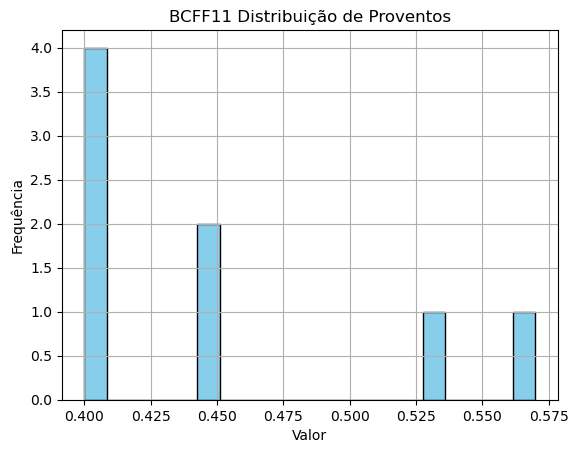

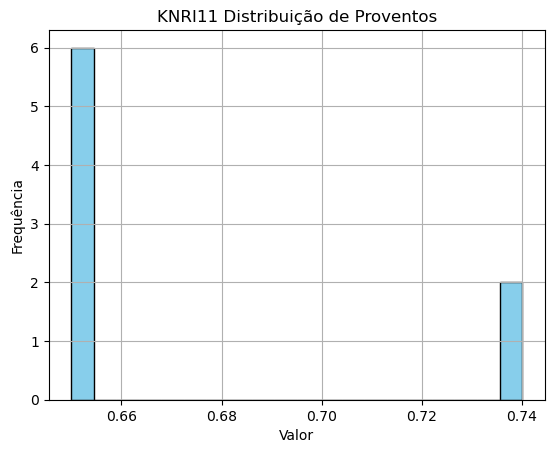

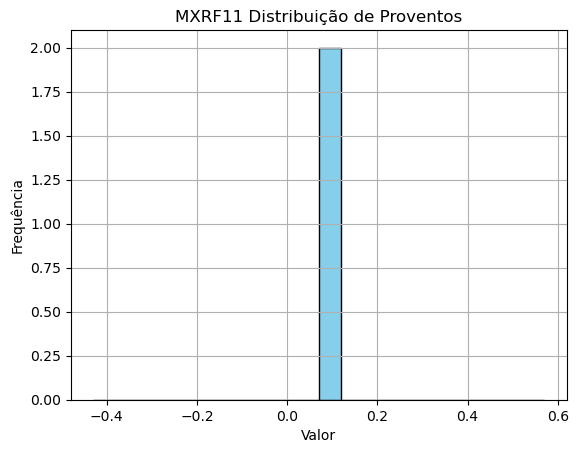

In [169]:
import matplotlib.pyplot as plt
ativos_relacao_positiva = df_relatorio[df_relatorio['ParcialNegativos'] > 0.0]
 
for a in ativos_relacao_positiva['Ativo'].unique():
    filtro_registros_ativo = dados['Ativo'] == a
    registros_ativo = dados[filtro_registros_ativo][:limite_meses_relatorios]

    plt.hist(registros_ativo['VALOR_DY_COTA'], bins=20, color='skyblue', edgecolor='black')
    plt.title(a + ' Distribuição de Proventos')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.grid(True)

    plt.show()


## Detalhando dividendos de um ativo

In [170]:
ativo = 'BCFF11'
registros = dados[ dados['Ativo'] == ativo ][:limite_meses_relatorios]
display(registros[['Ativo','Recebido','Valor por cota','Data pgto.','Data COM']])

,Ativo,Recebido,Valor por cota,Data pgto.,Data COM
2,BCFF11,"R$ 8,55","R$ 0,45",15/09/2020,08/09/2020
9,BCFF11,"R$ 8,55","R$ 0,45",14/08/2020,07/08/2020
14,BCFF11,"R$ 2,40","R$ 0,40",14/07/2020,07/07/2020
17,BCFF11,"R$ 3,20","R$ 0,40",15/06/2020,05/06/2020
21,BCFF11,"R$ 2,80","R$ 0,40",15/05/2020,08/05/2020
26,BCFF11,"R$ 0,80","R$ 0,40",15/04/2020,07/04/2020
30,BCFF11,"R$ 1,06","R$ 0,53",13/03/2020,06/03/2020
37,BCFF11,"R$ 1,14","R$ 0,57",14/02/2020,07/02/2020
